In [41]:
import pandas as pd
import requests
import urllib.parse as urlparse
import datetime

In [43]:
import requests
import datetime
import pandas as pd
from urllib import parse as urlparse

start = "-6.935271,107.717554"  # bunderan cibiru
end = "-6.917358,107.574423"  # bunderan cibeureum
key = "16mjJoC9KS9zNo9rZZJxsVYtqHeNVirt"  # API Key

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"

today = datetime.date.today()
departure_time_start = datetime.datetime(today.year, today.month, today.day - 1, 0, 0, 0)

hour_range = range(0, 24)

data_frames = []  # List to hold individual DataFrames

for i in hour_range:
    # Update an hour
    departure_time = departure_time_start.replace(hour=departure_time_start.hour + i)

    # Format datetime string
    departure_time = departure_time.strftime('%Y-%m-%dT%H:%M:%S')

    # Create request URL
    request_params = (
            urlparse.quote(start) + ":" + urlparse.quote(end)
            + "/json?departAt=" + urlparse.quote(departure_time))

    request_url = base_url + request_params + "&key=" + key

    # Get data
    response = requests.get(request_url)

    # Convert to JSON
    json_result = response.json()

    # Get summary
    route_summary = json_result['routes'][0]['summary']

    # Convert to data frame
    df = pd.json_normalize(route_summary)

    data_frames.append(df)  # Append to the list

    print(f"Retrieving data: {i + 1} / {len(hour_range)}")

# Concatenate all DataFrames in the list
final_df = pd.concat(data_frames, ignore_index=True)

Retrieving data: 1 / 24
Retrieving data: 2 / 24
Retrieving data: 3 / 24
Retrieving data: 4 / 24
Retrieving data: 5 / 24
Retrieving data: 6 / 24
Retrieving data: 7 / 24
Retrieving data: 8 / 24
Retrieving data: 9 / 24
Retrieving data: 10 / 24
Retrieving data: 11 / 24
Retrieving data: 12 / 24
Retrieving data: 13 / 24
Retrieving data: 14 / 24
Retrieving data: 15 / 24
Retrieving data: 16 / 24
Retrieving data: 17 / 24
Retrieving data: 18 / 24
Retrieving data: 19 / 24
Retrieving data: 20 / 24
Retrieving data: 21 / 24
Retrieving data: 22 / 24
Retrieving data: 23 / 24
Retrieving data: 24 / 24


In [44]:
data_frames

[   lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0          659952                21054                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-08-18T00:00:00-07:00  2023-08-18T05:50:53-07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0          659952                21295                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-08-18T01:00:00-07:00  2023-08-18T06:54:54-07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0          659037                21812                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-08-18T02:00:00-07:00  2023-08-18T08:03:31-07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0          659037                219

In [45]:
import matplotlib.pyplot as plt

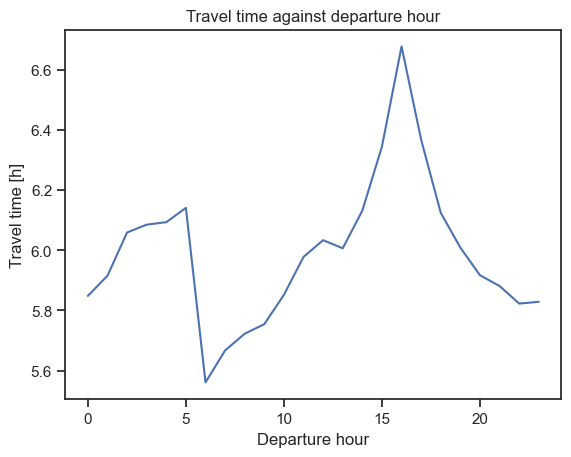

In [46]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.plot(final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time against departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

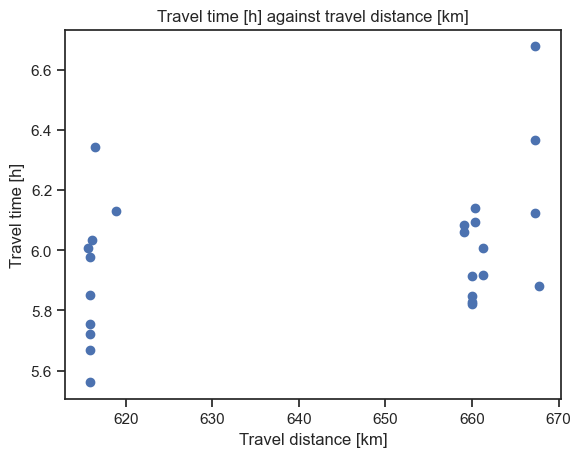

In [47]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.scatter(final_df['lengthInMeters'] / 1000, final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time [h] against travel distance [km]')
plt.xlabel('Travel distance [km]')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

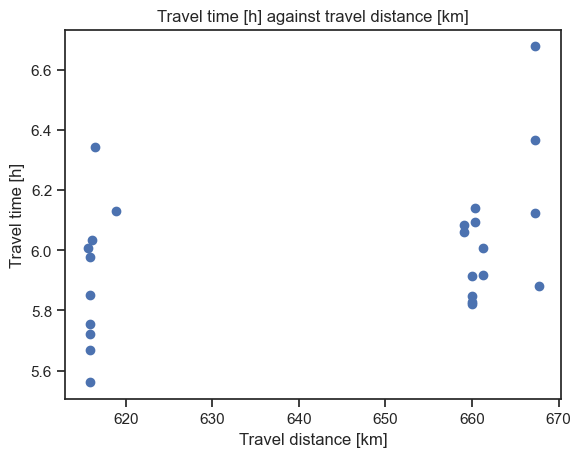

In [48]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.scatter(final_df['lengthInMeters'] / 1000, final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time [h] against travel distance [km]')
plt.xlabel('Travel distance [km]')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


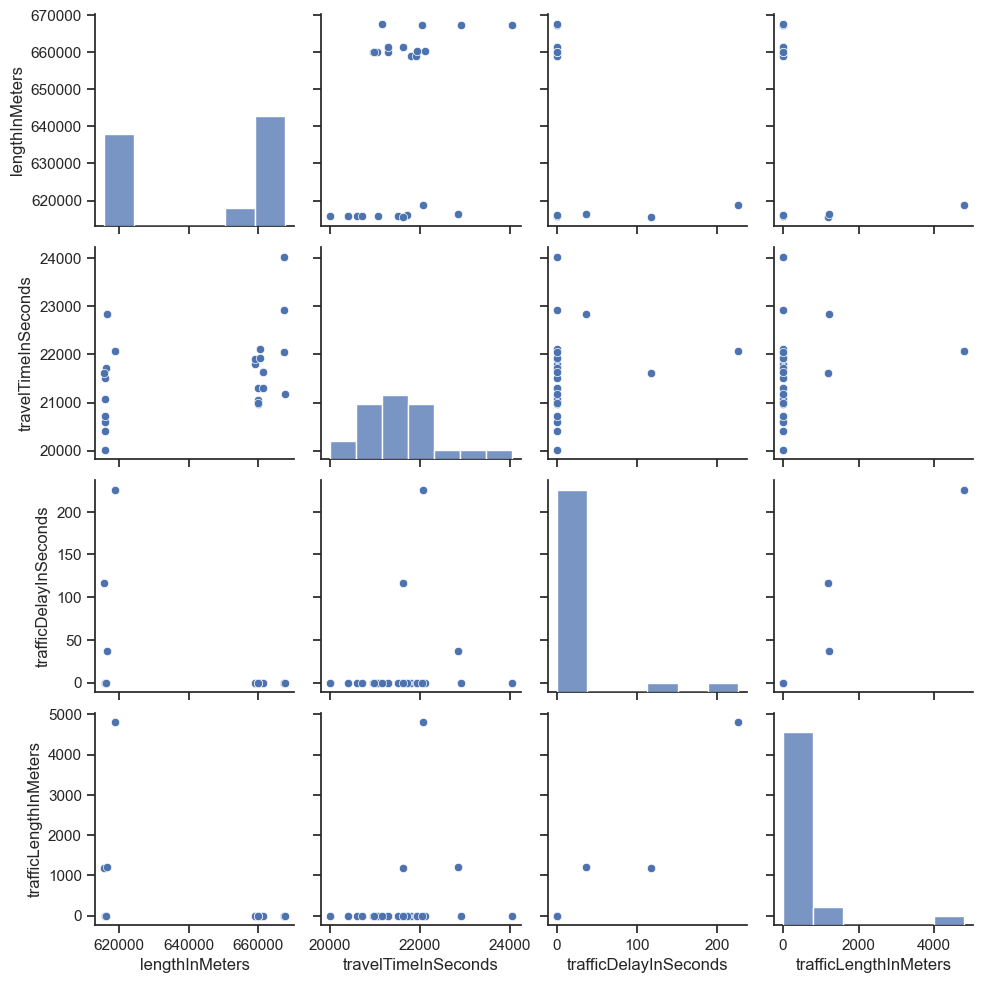

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame

# Set Seaborn theme
sns.set_theme(style="ticks")

# Create a pair plot
sns.pairplot(final_df)
plt.show()  # Show the plot